In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from my_linear_regression import *

In [2]:
#open file -> converted to csv for easier readings..
df = pd.read_csv('SNe_least_squares.csv')
# Clean column names
df.columns = df.columns.str.strip().str.replace(',', '')

#filter data to keep low redshifts
df.drop(df[df['z (redshift)'] >= 0.05].index, inplace=True)


#get the distance modulous and convert from megaparsecs
df['distance modulus (mu)'] = pd.to_numeric(df['distance modulus (mu)'], errors='coerce')
mu = df['distance modulus (mu)']
distance = distance_modulous(mu, 'megaparsecs')

df #to check the the df update..

#transform filtered data
l_distance = len(distance)
y_obs = np.zeros(l_distance)
x_obs = np.zeros(l_distance)

y_obs = np.log10(distance.to_numpy())
x_obs = np.log10(df['z (redshift)'].to_numpy())

#model y= mx+b' find m 1st make X -> its [xi, 1] and Y -> y_obs
X = np.column_stack((x_obs, np.ones_like(x_obs)))

#call fit_linear model
beta, cov = fit_linear_model (X, y_obs)
m, b0 = beta


Slope: 1.006 +/-  0.023 
Intercept: 0.290 +/-   0.037
H_0 = 66.607 ± 29.533


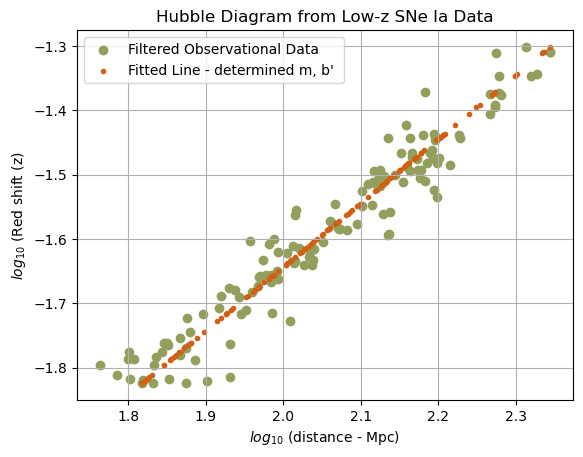

In [3]:
#calculate h_0 and uncertainty
standard_error = np.sqrt(np.diag(cov))
se_m, se_b0 = standard_error
h0, se_h0 = hubbles_constant(b0, se_b0)

#calc y based on m, b' gathered
y_pred = m*x_obs + b0

fig, ax = plt.subplots() # Correct usage
ax.scatter(y_obs, x_obs, c = '#939F5C', label = "Filtered Observational Data" )
ax.scatter(y_pred, x_obs, c = '#D16014', marker = '.', label = "Fitted Line - determined m, b' " )
ax.grid()
ax.legend()
ax.set_ylabel("$log_{10}$ (Red shift (z)")
ax.set_xlabel("$log_{10}$ (distance - Mpc)")
ax.set_title("Hubble Diagram from Low-z SNe Ia Data")

print(f"Slope:{m: .3f} +/- {se_m: .3f} \nIntercept:{b: .3f} +/-  {se_b0: .3f}")
print(f"H_0 = {h0:.3f} ± {se_h0:.3f}")

## Purpose of plot
    
    To see the correlation fo distance vs redshift and see how much it deviates from the theoretical fitted line.
    
## Analysis
1) ### Based on your visual inspection of the plot, does the linear model appear to be a good fit to the filtered data? Explain your reasoning. For instance, do the points generally follow the line? Are there any obvious systematic deviations or outliers?

   Based on my visual inspection of the plot the linear does appear to be a good fit to the filtered data. It's actually interesting because there really isn't any high deviation on the plot (for example like a point at the extremities (1.8, -1.0)). The points generally follow the line there may be deviations towards the middle at (2.2, -1.4) but beyond that the points mostly follow the line.
   
3) ### Discussion 1 (Slope): The simplifled theoretical model predicts a slope m = 1. Does your fitted slope (using the low-z data) signifcantly deviate from 1 (e.g., is 1 within $m\pm  \delta m$, where $\delta m$ is the standard error of the slope)? Briey discuss.

    Surprsingly, yes the theoretical model matches pretty weel to my fitted slope. My result for m was 1.015 which on order of magnitude is the same there is just round-off errors with .015.. I think some of the errors that could of happened to make a value for the slope for m to go higher/lower would probably be unit conversions.

4) ### Discussion 2 (H0 Value): Compare your value of H0 to currently accepted values, which are typically in the range of 67􀀀74 km/s/Mpc). Discuss any discrepancies and potential reasons (e.g., the simplicity of the model even for low z, data limitations, statistical uncertainties, impact of the chosen z-cut).

   My H0 was lowered than the accepted value initially (when I had the redshift values at >0.1 but I made a second attempt to lower the accepted values to >0.05). This increased my H0 Value to 66.607 from 64.651. I think because the data was larger with the >0.1 there was more acceptable uncertainity which led H0 to be lower. The impact of the chosen z-cut has a large impact overall the output of H0 being found. I think also because I defined c - speed of light, as 3E10 from my astro_constants module this also made an impact on how the final output H0 became based on rounding errors.
